# Modelado

La idea es armar las ecuaciones diferenciales (PDE) que van a modelar el crecimiento del fuego en el campo. 
Se parte del modelo 2D simple y se lo va complejizando al mismo tiempo que se lo discretiza.

Los pasos (por el momento) son:

1. Modelo 2D en medio isotropico (todo el plano es del mismo material).
2. Modelo 2D en medio no isotropico pero constante en el tiempo.
3. Agregar termino del viento al modelo.
4. Evaluar agregar un [termino de Fisher al modelo.](https://en.wikipedia.org/wiki/Fisher%27s_equation)
5. La conductividad termica (el material del plano) es funcion del espacio, del tiempo y la temperatura (x, y, t, T).
6. Agregado dinamico de los datos reales.

# 1 Ecuacion de calor

La ecuacion de calor en dos dimenciones es:

$$\rho c_{p} \frac{\partial T}{\partial t} = \frac{\partial}{\partial x} \left( k_x \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left( k_y \frac{\partial T}{\partial y} \right) \quad 0 \leq x \leq L, \quad 0 \leq y \leq M, \quad t \leq 0$$

Donde $T$ es la temperatura (variable dependiente) en el punto $T(x, y, t)$ medida en Kelvin, $L$ y $M$ son los limites de las dos dimenciones en metros. Ademas

$$\left\{
	\begin{array}{ll}
		\rho  & Densidad\space del\space medio\quad & \left[ \frac{Kg}{m^{3}} \right]\\
		c_{p} & Calor\space especifico\space del\space material\quad & \left[ \frac{J}{K Kg} \right]\\
        k_{x} & Conductividad\space termica\space en\space x\quad & \left[ \frac{W}{mK} \right]\\
        k_{y} & Conductividad\space termica\space en\space y\quad & \left[ \frac{W}{mK} \right]
	\end{array}
\right.$$

# 2 Metodos de diferencia finita

EXPLICAR LA DISCRETIZACION DEL ESPACIO Y LOS INDICES i, j

## 2.1 Metodo explicito de primer orden (Forward Difference)

Consiremos una serie de Taylor de la funcion de temperatura $T(x, y)$ solamente en la direccion $x$ para el punto $x_{i}$

$$T(x_{i} + \delta x, y_{j}) = T(x_{i}, y_{j}) + \delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} + \frac{\delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Donde $\delta x$ es el cambio en $x$ relativo a $x_{i}$. Tomando $\delta x = \Delta x$ la ecuacion anterior nos queda

$$T(x_{i} + \Delta x, y_{j}) = T(x_{i}, y_{j}) + \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} + \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Resolviendo para $(\partial T/\partial x)_{x_{i}}$

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} = \frac{T(x_{i} + \Delta x, y_{j}) - T(x_{i}, y_{j})}{\Delta x} - \frac{\Delta x}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} - \frac{\Delta x^{2}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Sustituyendo en la ecuacion anterior la solucion aproximada por la solucion exacta, $T_{i,j} = T{x_{i}, y_{j}}$ y $T_{i+1, j} = T{x_{i+1}, y_{j}}$

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} = \frac{T_{i+1, j} - T_{i, j}}{\Delta x} - \frac{\Delta x}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} - \frac{\Delta x^{2}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Usando el teorema del valor medio para reemplazar las derivadas de alto orden obtenemos

$$\frac{\Delta x}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} + ... = \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{\xi}$$

Donde $x_{i} \leq \xi \leq x_{i+1}$. Entonces

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} \approx \frac{T_{i+1, j} - T_{i, j}}{\Delta x} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{\xi}$$

Al ultimo termino de la ecuacion es el error de truncado de la aproximacion de diferencia finitas. Como este error es desconocido (debido a que no conocemos $\xi$) se lo representa con la notacion de la "gran $\mathcal{O}$"

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}}= \frac{T_{i+1, j} - T_{i, j}}{\Delta x} + \mathcal{O}(\Delta x)$$

La ultima ecuacion es llamada el metodo explicito de la ecuacion $(\partial T/\partial x)_{x_{i}}$ por que involucra los nodos $x_{i}$ y $x_{i+1}$. El error de este metodo es $\mathcal{O}(\Delta x)$ y esta controlado por $\Delta x$

## 2.2 Metodo implicito de primer orden (Backward Difference)

Si tomamos la serie de Taylor pero reemplazamos $\delta x = - \Delta x$ obtenemos

$$T_{i -1, j} = T_{i, j} - \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} - \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Notar la alternancia de signos es esta nueva formulacion. Resolviendo nuevamente para $(\partial T/\partial x)_{x_{i}}$ y utilizando la notacion del la "gran $\mathcal{O}$" obtenemos

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}}= \frac{T_{i, j} - T_{i-1, j}}{\Delta x} + \mathcal{O}(\Delta x)$$

Este es llamado el metodo implicito por que involucra $x_{i}$ y $x_{i-1}$ para calcular $T$

## 2.3 Diferencia centrada de primer orden

Desarrollando la serie de Taylor para $T_{i+1, j}$ y $T_{i-1, j}$

$$T_{i +1, j} = T_{i, j} + \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} + \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

$$T_{i -1, j} = T_{i, j} - \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} - \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Restando las ecuaciones anteriores obtenemos

$$T_{i + 1, j} - T_{i - 1, j} = 2 \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{2 (\Delta x)^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Resolviendo nuevamente para $(\partial T/\partial x)_{x_{i}}$

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} = \frac{T_{i+1, j} - T_{i-1, j}}{2 \Delta x} + \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

o

$$\frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} = \frac{T_{i+1, j} - T_{i-1, j}}{2 \Delta x} + \mathcal{O}(\Delta x^{2})$$

Para obtener buenas soluciones, se tiene que usar un $\Delta x$ pequeno. Cuando $\Delta x \ll 1$, el error de truncado en la diferencia central converge a 0 mucho mas rapido que los otros dos metodos

## 2.4 Diferencia centrada de segundo orden (Central Difference)

Aproximaciones finitas para derivadas de orden superior se pueden obtener mediante la manipulaion de la serie de Taylor para $T_{i+1, j}$ y $T_{i-1, j}$

$$T_{i +1, j} = T_{i, j} + \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} + \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

$$T_{i -1, j} = T_{i, j} - \Delta x \frac{\partial T}{\partial x}\bigg\rvert_{x_{i}} + \frac{\Delta x^{2}}{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} - \frac{\Delta x^{3}}{3!} \frac{\partial^{3} T}{\partial x^{3}}\bigg\rvert_{x_{i}} +\space ...$$

Donde, si sumamos las ecuaciones obtenemos

$$T_{i +1, j} + T_{i -1, j} = 2T_{i, j} + (\Delta x)^{2} \frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} + \frac{2(\Delta x)^{2}}{4!} \frac{\partial ^{4} T}{\partial x^{4}}\bigg\rvert_{x_{i}} + ...$$

Resolviendo para $(\partial ^{2} T/\partial x^{2})_{x_{i}}$

$$\frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} = \frac{T_{i +1, j} - 2T_{i, j} + T_{i -1, j}}{\Delta x^{2}} + \frac{(\Delta x)^{2}}{12} \frac{\Delta ^{4} T}{\Delta x^{4}}\bigg\rvert_{x_{i}} + ...$$

Y, usando la notacion de la "gran $\mathcal{O}$" obtenemos

$$\frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} = \frac{T_{i +1, j} - 2T_{i, j} + T_{i -1, j}}{\Delta x^{2}} + \mathcal{O}(\Delta x^{2})$$

Esta tambien es la diferencia centrada pero de segundo orden.

# 3 Caso isotropico

Si el material es isotropico (tiene la misma conductividad termica en todas las direcciones) y ademas esta conductividad no depende del tiempo, entonces $k_{x} = k_{y} = k$ y la ecuacion original del calor nos queda

$$\rho c_{p} \frac{\partial T}{\partial t} = k \frac{\partial^{2} T}{\partial x^{2}} + k \frac{\partial^{2} T}{\partial y^{2}}$$

Reacomodando los terminos obtenemos

$$\frac{\partial T}{\partial t} = \alpha \left( \frac{\partial^{2} T}{\partial x^{2}} + \frac{\partial^{2} T}{\partial y^{2}} \right)$$

Donde $\alpha = \frac{k}{\rho c_{p}}$ es una constante.

## 3.1 Diferencias finitas

Aproximando la derivada del tiempo de la ecuacion del calor anterior usando forward difference obtenemos

$$\frac{\partial T}{\partial t}\bigg\rvert_{m+1, x, j} = \frac{T^{m+1}_{i, j} - T^{m}_{i, j}}{\Delta t} + \mathcal{O}(\Delta t)$$

Los super-indices indican el tiempo y los supra-indices indican el espacio.

Usando la aproximacion de central difference para las derivadas parciales de segundo orden con respecto a $x$ e $y$ obtenemos

$$
\begin{eqnarray}
\frac{\partial^{2} T}{\partial x^{2}}\bigg\rvert_{x_{i}} &=& \frac{T^{m}_{i + 1, j} - 2T^{m}_{i, j} + T^{m}_{i - 1, j}}{\Delta x^{2}} + \mathcal{O}(\Delta x^{2}) \\
\frac{\partial^{2} T}{\partial y^{2}}\bigg\rvert_{y_{i}} &=& \frac{T^{m}_{i, j + 1} - 2T^{m}_{i, j} + T^{m}_{i, j - 1}}{\Delta y^{2}} + \mathcal{O}(\Delta y^{2})
\end{eqnarray}
$$

Reemplazando las ultimas 3 ecuaciones en la ecuacion del calor nos queda

$$\frac{T^{m+1}_{i, j} - T^{m}_{i, j}}{\Delta t} = \alpha \left( \frac{T^{m}_{i + 1, j} - 2T^{m}_{i, j} + T^{m}_{i - 1, j}}{\Delta x^{2}} + \frac{T^{m}_{i, j + 1} - 2T^{m}_{i, j} + T^{m}_{i, j - 1}}{\Delta y^{2}} \right) + \mathcal{O}(\Delta t) + \mathcal{O}(\Delta x^{2}) + \mathcal{O}(\Delta y^{2}) $$

Notar que los errores temporales y los errores espaciales tienen distinto orden y ademas que $T^{m+1}_{i, j}$ solo depende de $T$ en el tiempo $m$. Descartando los errores y despejando $T^{m+1}_{i, j}$ obtenemos

$$T^{m+1}_{i, j} = T^{m}_{i, j} + \Delta t \space \alpha \left( \frac{T^{m}_{i + 1, j} - 2T^{m}_{i, j} + T^{m}_{i - 1, j}}{\Delta x^{2}} + \frac{T^{m}_{i, j + 1} - 2T^{m}_{i, j} + T^{m}_{i, j - 1}}{\Delta y^{2}} \right)$$

Si $\Delta x = \Delta y = h$ entonces nos queda

$$T^{m+1}_{i, j} = T^{m}_{i, j} + \alpha \frac{\Delta t}{h^{2}} \left( T^{m}_{i + 1, j} + T^{m}_{i, j + 1} - 4T^{m}_{i, j} + T^{m}_{i - 1, j} + T^{m}_{i, j - 1} \right)$$

Definiendo $r = \alpha \frac{\Delta t}{h^{2}}$ y reordenando los terminos para un mejor computo la ecuacion final nos queda

$$T^{m+1}_{i, j} = r T^{m}_{i + 1, j} + r T^{m}_{i, j + 1} + (1 - 4r)T^{m}_{i, j} + r T^{m}_{i - 1, j} + r T^{m}_{i, j - 1}$$

## 3.2 Estabilidad numerica

Para que el modelo sea estable se puede demostrar que el coeficiente en $T^{m}_{i, j}$ tiene que no ser negativo por lo que

$$
\begin{eqnarray}
1 - 4r &>& 0 \\
4\alpha \frac{\Delta t}{h^{2}} &<& 1 \\
\Delta t &<& \frac{h^{2}}{4\alpha}
\end{eqnarray}
$$

## 3.3 Dirichlet boundary condition

Se impone el valor que tiene que tomar la solucion de la ecuacion diferencial en los bordes. Este valor puede ser una constante o una funcion. En el caso 2D de la ecuacion de calor, se impone el valor de la temperatura en los bordes del plano. Siendo la temperatura una funcion de la forma $T(x, y, t)$ donde $0 < x < L\space$ y $\space0 < y < M$ unas condiciones de Dirichlet pueden ser

$$
\begin{eqnarray}
T(0, y, t) &=& 500K\space &\textrm{para todo y (borde izq)} \\
T(x, M, t) &=& 293K \space &\textrm{para todo x (borde sup)} \\
T(L, y, t) &=& 293K \space &\textrm{para todo y (borde der)} \\
T(x, 0, t) &=& 500K\space &\textrm{para todo x (borde inf)}
\end{eqnarray}
$$

En el caso de Dirichlet se piensa que el plano esta conectado perfectamente con diversas fuentes de calor perfectas.

La implementacion numerica de Dirichlet es simple ya que solo se tiene que cambiar los valores de los bordes de la matrix de temperatura para cada iteracion de $\Delta t$.

## 3.4 Neumann boundary condition

Neumann regula el flujo que existe en las fronteras, es decir impone el valor de la derivada parcial de la funcion para cada uno de los bordes del plano. Por ejemplo, podemos setear el flujo del borde izquierdo a 0

$$
\frac{\partial T}{\partial x} = 0\quad \textrm{para}\space x=0,\space 0 \leq y \leq L
$$

Discretizando la derivada usando diferencias centradas para el punto $T^{m+1}_{i, j}$ y recordando que $\Delta x = \Delta y = y$ obtenemos

$$\frac{T^{m}_{i+1, j} - T^{m}_{i-1, j}}{2h} = 0$$

Entonces, para implementar Neumann necesitamos que

$$T^{m}_{i+1, j} = T^{m}_{i-1, j}$$

Lo cual nos lleva a un problema por que para el caso de $i = 0$ vamos a tener un punto no definido en nuestra grilla $T^{m}_{-1, j}$. Retomando la ecuacion discretizada del calor para el caso $i = 0$

$$T^{m+1}_{0, j} = r T^{m}_{1, j} + r T^{m}_{0, j + 1} + (1 - 4r)T^{m}_{0, j} + r T^{m}_{-1, j} + r T^{m}_{0, j - 1}$$

Wsta ecuacion tambien cae en el problema de no estar denifida en $T^{m}_{-1, j}$, pero utilizando la anterior igualdad podemos usar $T^{m}_{1, j}$ para saltar el punto no definido y la condicion de Neumman nos queda

$$T^{m+1}_{0, j} = 2r T^{m}_{1, j} + r T^{m}_{0, j + 1} + (1 - 4r)T^{m}_{0, j} + r T^{m}_{0, j - 1}$$

Haciendo el mismo truco, podemos calcular la forma discreta de Neumman con flujo 0 para todos los bordes del plano.

$$
\begin{eqnarray}
T^{m+1}_{0, j} &=& 2r T^{m}_{1, j} + r T^{m}_{0, j + 1} + &(1 - 4r)T^{m}_{0, j} + r T^{m}_{0, j - 1} &\quad \textrm{(borde izq)} \\
T^{m+1}_{i, 0} &=& r T^{m}_{i+1, 0} + 2r T^{m}_{i, 1} + &(1 - 4r)T^{m}_{i, 0} + r T^{m}_{i-1, 0} &\quad \textrm{(borde sup)} \\
T^{m+1}_{L, j} &=& r T^{m}_{L, j + 1} + &(1 - 4r)T^{m}_{L, j} + 2r T^{m}_{L - h, j} + r T^{m}_{L, j - 1} &\quad \textrm{(borde der)} \\
T^{m+1}_{i, M} &=& r T^{m}_{i+1, M} + &(1 - 4r)T^{m}_{i, M} + r T^{m}_{i-1, M} + 2r T^{m}_{i, M-h} &\quad \textrm{(borde inf)} \\
\end{eqnarray}
$$

Usando el mismos trucos podemos calcular la forma discreta de la condicion de Neumann pero con flujo constante distinto de 0

$$\frac{\partial T}{\partial x} = \frac{T^{m}_{i+1, j} - T^{m}_{i-1, j}}{2h} = c$$

$$
\begin{eqnarray}
T^{m+1}_{0, j} &=& 2r T^{m}_{1, j} + r T^{m}_{0, j + 1} + &(1 - 4r)T^{m}_{0, j} + r T^{m}_{0, j - 1} &-2rhc &\quad \textrm{(borde izq)} \\
T^{m+1}_{i, 0} &=& r T^{m}_{i+1, 0} + 2r T^{m}_{i, 1} + &(1 - 4r)T^{m}_{i, 0} + r T^{m}_{i-1, 0} &-2rhc &\quad \textrm{(borde sup)} \\
T^{m+1}_{L, j} &=& r T^{m}_{L, j + 1} + &(1 - 4r)T^{m}_{L, j} + 2r T^{m}_{L - h, j} + r T^{m}_{L, j - 1}  &+2rhc &\quad \textrm{(borde der)} \\
T^{m+1}_{i, M} &=& r T^{m}_{i+1, M} + &(1 - 4r)T^{m}_{i, M} + r T^{m}_{i-1, M} + 2r T^{m}_{i, M-h} &+2rhc &\quad \textrm{(borde inf)} \\
\end{eqnarray}
$$

In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML

In [2]:
class HeatEq:
    def __init__(self, config_path):
        with open(config_path) as f:
            self.config = yaml.load(f, Loader=yaml.CLoader)
        
        # Delta de tiempo [s]
        self.dt = (self.config['density']*self.config['heat_capacity']*self.config['h']**2)/(4*self.config['kappa'])
        # Grid points
        self.nx = int(self.config['L']/self.config['h'])
        self.ny = int(self.config['M']/self.config['h'])

        self.partials = []
        
    def solve(self):
        # Calculo una sola vez estos parametros
        r  = (self.config['kappa']*self.dt)/(self.config['density']*self.config['heat_capacity']*self.config['h']**2)
        r2 = 1 - 4 * r

        # Temperature matrix
        T = np.ones((self.ny, self.nx))

        # Initial temp
        T = self.config['temp_init'] * T
        T_new = T.copy()
                
        # Initial conditions
        T, T_new = self.__bounries(T, T_new, r, r2)

        self.partials = []
        self.partials.append(T)

        total = int(self.config['time']/self.dt)
        step = int(self.config['img_at']*total/100)

        for i in range(total):
            if i % 100 == 0:
                print(f'\rSolving iteration {i}/{total} ({i*100/total:.2f}%)', end='')
            
            T_new[1:-1, 1:-1] = r*T[1:-1, 2:] + r*T[2:, 1:-1] + r2*T[1:-1, 1:-1] \
                + r*T[1:-1, :-2] + r*T[:-2, 1:-1]
            
            # Boundary conditions
            T, T_new = self.__bounries(T, T_new, r, r2)
            
            if i % step == 0:
                self.partials.append(T.copy())
            
        self.partials.append(T.copy())

    
    def plot(self, colors=['#00008f', '#009fff', '#8fff6f', '#ff6f00', '#7f0000'], n_bins=100, figsize=(8, 6)):
        fig_index = 0
        temp_min = self.partials[-1].min()
        temp_max = self.partials[-1].max()

        # Create the colormap
        cm = LinearSegmentedColormap.from_list('custom_bar', colors, N=n_bins)
        
        fig, ax = plt.subplots(figsize=figsize)
        im = plt.imshow(self.partials[0], vmin=temp_min, vmax=temp_max, interpolation='nearest', cmap=cm)
        
        # Set axis and ref
        x_labels = [f'{i:.3f}' for i in np.linspace(0, self.config['L'], num=10)]
        y_labels = [f'{i:.3f}' for i in np.linspace(0, self.config['M'], num=10)]
        plt.xticks(np.linspace(0, self.nx, num=10), x_labels, rotation=45)
        plt.yticks(np.linspace(0, self.ny, num=10), y_labels)
        plt.colorbar()

        def updatefig(frame):
            total = int(self.config['time']/self.dt)
            step = int(self.config['img_at']*total/100)
            
            im.set_array(self.partials[frame + 1])
            ax.set_title(f'Time: {self.dt * step * frame:.2g} seg')
            return im,

        anim = animation.FuncAnimation(fig, updatefig, frames=len(self.partials) - 1, blit=True)
        return HTML(anim.to_jshtml())


    def __bounries(self, T, T_new, r, r2):
        # Boundary conditions
        if 'left' in self.config['boundary'] and self.config['boundary']['left']['type'] == 'dirichlet':
            T_new[:, 0] = self.config['boundary']['left']['value']
        elif 'left' in self.config['boundary'] and self.config['boundary']['left']['type'] == 'neumann':
            T_new[1:-1, 0] = 2*r*T[1:-1, 1] + r*T[2:, 0] + r2*T[1:-1, 0] + r*T[:-2, 0] \
                - 2*r*self.config['h']*self.config['boundary']['left']['value']

        if 'top' in self.config['boundary'] and self.config['boundary']['top']['type'] == 'dirichlet':
            T_new[0, :] = self.config['boundary']['top']['value']
        elif 'top' in self.config['boundary'] and self.config['boundary']['top']['type'] == 'neumann':
            T_new[0, 1:-1] = r*T[0, 2:] + 2*r*T[1, 1:-1] + r2*T[0, 1:-1] + r*T[0, :-2] \
                - 2*r*self.config['h']*self.config['boundary']['left']['value']

        if 'right' in self.config['boundary'] and self.config['boundary']['right']['type'] == 'dirichlet':
            T_new[:, -1] = self.config['boundary']['right']['value']
        elif 'right' in self.config['boundary'] and self.config['boundary']['right']['type'] == 'neumann':
            T_new[1:-1, -1] = r*T[2:, -1] + r2*T[1:-1, -1] + 2*r*T[1:-1, -2] + r*T[:-2, -1] \
                + 2*r*self.config['h']*self.config['boundary']['right']['value']

        if 'bottom' in self.config['boundary'] and self.config['boundary']['bottom']['type'] == 'dirichlet':
            T_new[-1, :] = self.config['boundary']['bottom']['value']
        elif 'bottom' in self.config['boundary'] and self.config['boundary']['bottom']['type'] == 'neumann':
            T_new[-1, 1:-1] = r*T[-1, 2:] + r2*T[-1, 1:-1] + r*T[-1, :-2] + 2*r*T[-2, 1:-1] \
                + 2*r*self.config['h']*self.config['boundary']['bottom']['value']

        T = T_new.copy()
        
        return T, T_new

Solving iteration 6300/6397 (98.48%)

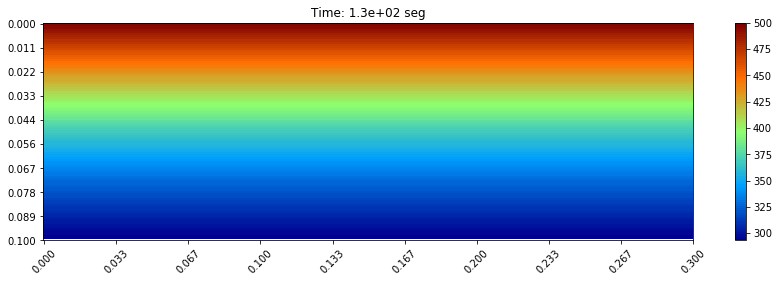

In [3]:
# Una fuente de calor arriba de 500K, abajo de 293K y Neumann = 0 en los costado
# Plancha de acero
heat = HeatEq('./input/config-iso-steal.yaml')
heat.solve()
heat.plot(figsize=(15, 4))

Solving iteration 54900/54951 (99.91%)

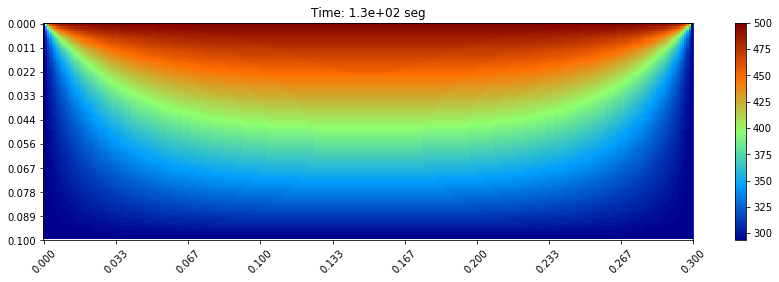

In [7]:
# Una fuente de calor arriba de 500K, y el resto a 293K
# Plancha de cobre
heat = HeatEq('./input/config-iso-copper.yaml')
heat.solve()
heat.plot(figsize=(15, 4))

In [5]:
# Una fuente de calor arriba y a la derecha de 500K y a la derecha y abajo de 293K
# Plancha de aluminio
heat = HeatEq('./input/config-iso-al-diag.yaml')
heat.solve()
heat.plot()

Solving iteration 46700/46728 (99.94%)

In [6]:
# Una fuente de calor arriba y a la derecha de 500K, derecha y abajo Neumann = 0
# Plancha de alumnio
heat = HeatEq('./input/config-iso-al-diag-neumann.yaml')
heat.solve()
heat.plot()

Solving iteration 46700/46728 (99.94%)

# Next

Si bien se puede jugar con las condiciones iniciales, esta simulacion con un unico tipo de material no deja de ser un tipico ejemplo de libro. "Divertido" pero muy lejos de la realidad. El proximo paso es considerar que el plano lo componen diversos materiales.